# Analysis

Monkeypox is an infectious disease caused by the monkeypox virus that can occur in certain animals, including humans. Symptoms begin with fever, headache, muscle pains, swollen lymph nodes, and feeling tired.

An ongoing outbreak of monkeypox was confirmed on 6 May 2022, beginning with a British resident who, after traveling to Nigeria (where the disease is endemic), presented symptoms consistent with monkeypox on 29 April 2022. The resident returned to the United Kingdom on 4 May, creating the country's index case of the outbreak.

In [39]:
# Increase width of Jupyter Notebook Interface
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# About the dataset

Monkey_Pox_Cases_Worldwide : This dataset contains a tally of confirmed and suspected cases in all the countries.

Worldwide_Case_Detection_Timeline : This dataset contains the timeline for confirmed cases w.r.t. date time, it also contains some other details on every case that is being reported.

Daily_Country_Wise_Confirmed_Cases : This dataset contains the daily number of confirmed cases for all the countries where the virus has entered.

In [2]:
# Read data files
case = pd.read_csv('Monkey_Pox_Cases_Worldwide.csv')
case_timeline = pd.read_csv('Worldwide_Case_Detection_Timeline.csv')
confirmed_case = pd.read_csv('Daily_Country_Wise_Confirmed_Cases.csv')

In [6]:
# Print shape of data files (row, column)
print('Cases Worldwide: ', case.shape)
print('Case Detection Timeline: ', case_timeline.shape)
print('Daily Confirmed Cases: ', confirmed_case.shape)

Cases Worldwide:  (125, 6)
Case Detection Timeline:  (58002, 9)
Daily Confirmed Cases:  (107, 129)


# Data exploration

In [12]:
case.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,3320.0,0.0,5.0,2.0,7.0
1,Portugal,871.0,0.0,0.0,0.0,34.0
2,Spain,6884.0,0.0,13.0,2.0,0.0
3,United States,21761.0,0.0,4.0,41.0,11.0
4,Canada,1320.0,12.0,1.0,5.0,0.0


In [13]:
case_timeline.head()  # Lots of NaN

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
4,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN


In [15]:
confirmed_case.head()

,Country,2022-01-31,2022-02-17,2022-02-28,2022-03-04,2022-03-31,2022-04-10,2022-04-12,2022-04-30,2022-05-06,...,2022-08-31,2022-09-01,2022-09-02,2022-09-03,2022-09-04,2022-09-05,2022-09-06,2022-09-07,2022-09-08,2022-09-09
0,Nigeria,3,0,1,0,6,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
1,Cameroon,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central African Republic,0,0,0,2,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Republic of Congo,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,England,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,63,0,0,0,0


In [64]:
print(f"Case Dataset Information:\n")
case.info()

Case Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             125 non-null    object
 1   Confirmed_Cases     125 non-null    int64 
 2   Suspected_Cases     125 non-null    int64 
 3   Hospitalized        125 non-null    int64 
 4   Travel_History_Yes  125 non-null    int64 
 5   Travel_History_No   125 non-null    int64 
 6   Total_Cases         125 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 7.0+ KB


In [63]:
print(f"Summary of case dataset:")
case.describe().T  # transpose

Summary of case dataset:


,count,mean,std,min,25%,50%,75%,max
Confirmed_Cases,125.0,461.496,2153.757181,0.0,2.0,5.0,71.0,21761.0
Suspected_Cases,125.0,27.056,242.531884,0.0,0.0,0.0,0.0,2681.0
Hospitalized,125.0,1.184,2.826670,0.0,0.0,0.0,1.0,18.0
Travel_History_Yes,125.0,2.128,4.827635,0.0,0.0,1.0,3.0,41.0
Travel_History_No,125.0,0.720,3.566420,0.0,0.0,0.0,0.0,34.0
Total_Cases,125.0,488.552,2163.918416,0.0,2.0,6.0,71.0,21761.0


### Checking for nulls in dataset

In [51]:
case.isnull().sum().to_frame().T  # Convert Series to DataFrame

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,Total_Cases
0,0,0,0,0,0,0,0


In [65]:
case_timeline.isnull().sum().to_frame().T  # Lots of nulls; need to clean later

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,0,0,56808,55225,55688,57816,57715,57605,57673


In [54]:
confirmed_case.isnull().sum().to_frame()

,0
Country,0
2022-01-31,0
2022-02-17,0
2022-02-28,0
2022-03-04,0
...,...
2022-09-05,0
2022-09-06,0
2022-09-07,0
2022-09-08,0


In [57]:
print(case["Country"].shape)
print(f'\n There are {len(case["Country"].unique())} countries with record of monkeypox cases. \n')
case["Country"].unique()

(125,)

 There are 125 countries with record of monkeypox cases. 



array(['England', 'Portugal', 'Spain', 'United States', 'Canada',
       'Sweden', 'Italy', 'France', 'Belgium', 'Australia', 'Germany',
       'Netherlands', 'Israel', 'Switzerland', 'Greece', 'Austria',
       'Argentina', 'Denmark', 'Morocco', 'Slovenia', 'Scotland',
       'Czech Republic', 'United Arab Emirates', 'Finland', 'Wales',
       'Northern Ireland', 'Sudan', 'Bolivia', 'Iran', 'Ecuador', 'Malta',
       'Ireland', 'Mexico', 'Pakistan', 'French Guiana', 'Thailand',
       'Peru', 'Brazil', 'Malaysia', 'Hungary', 'Norway', 'Paraguay',
       'Costa Rica', 'Gibraltar', 'Mauritius', 'Haiti', 'Uruguay',
       'Latvia', 'Cayman Islands', 'Kosovo', 'Turkey', 'Bahamas', 'Ghana',
       'India', 'Iceland', 'Poland', 'Bangladesh', 'Uganda', 'Cambodia',
       'Malawi', 'Venezuela', 'Romania', 'Georgia', 'Slovakia',
       'Luxembourg', 'Nepal', 'Chile', 'Serbia', 'Lebanon', 'South Korea',
       'Singapore', 'South Africa', 'Taiwan', 'Colombia', 'Croatia',
       'Bulgaria', 'Som

In [29]:
case_timeline.describe()

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
count,58002,58002,1194,2777,2314,186,287,397,329
unique,128,108,161,83,5,89,2,1,2
top,2022-08-22,United States,Toronto,20-69,male,genital ulcer lesions,N,Y,Y
freq,2063,22017,467,615,2272,30,161,397,241


# Preparing Data:

In [31]:
case.head(1)

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,3320.0,0.0,5.0,2.0,7.0


In [34]:
# Converting from Float to Int for quicker calculations
case[["Confirmed_Cases"]] = case[["Confirmed_Cases"]].astype("int")
case[["Suspected_Cases"]] = case[["Suspected_Cases"]].astype("int")
case[["Hospitalized"]] = case[["Hospitalized"]].astype("int")
case[["Travel_History_Yes"]] = case[["Travel_History_Yes"]].astype("int")
case[["Travel_History_No"]] = case[["Travel_History_No"]].astype("int")

case.dtypes

Country               object
Confirmed_Cases        int64
Suspected_Cases        int64
Hospitalized           int64
Travel_History_Yes     int64
Travel_History_No      int64
dtype: object

In [36]:
case["Total_Cases"] = case[["Confirmed_Cases", "Suspected_Cases"]].sum(axis=1)  # Create Total_Cases column; axis=1 means function is applied row-wise on the df
case.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,Total_Cases
0,England,3320,0,5,2,7,3320
1,Portugal,871,0,0,0,34,871
2,Spain,6884,0,13,2,0,6884
3,United States,21761,0,4,41,11,21761
4,Canada,1320,12,1,5,0,1332


### Cleaning 'case_timeline' dataset


In [67]:
case_timeline.head(1)

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
case_timeline.describe()

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
count,58002,58002,1194,2777,2314,186,287,397,329
unique,128,108,161,83,5,89,2,1,2
top,2022-08-22,United States,Toronto,20-69,male,genital ulcer lesions,N,Y,Y
freq,2063,22017,467,615,2272,30,161,397,241


In [149]:
# case_country = case_timeline[["Country", "City"]]  # create new df with only 'Country' and 'City columns'
# case_country_a = case_country.dropna()  # create new df that has dropped na values
# case_country_a.value_counts()

In [150]:
# case_country_b = case_country_a.value_counts(['Country']).reset_index(name='Total')
# case_country_b.head()

In [151]:
# Top 10 countries with most cases
# case_country_b[:10]

# Visualization portion

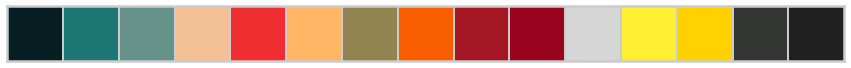

In [84]:
# Custom Palete for Visualization
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = .7)

palette = ["#071e22","#1d7874","#679289","#f4c095","#ee2e31",
           "#ffb563","#918450","#f85e00","#a41623","#9a031e",
           "#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

sns.palplot(sns.color_palette(palette))
plt.show()

In [147]:
# _,axs = plt.subplots(1,1, figsize=(18,6))
# plt.tight_layout(pad=4.0)

# p = sns.barplot(x=case_country_b["Country"][:10], y=case_country_b["Total"], palette=palette, saturation=1)
# p.set_label("Total Monkeypox Cases")
# p.set_xticklabels(p.get_xticklabels(), rotation= 90)

# for container in p.containers:
#         p.bar_label(container, label_type="edge", padding=2, size=15, color="black", rotation=45)

# plt.suptitle("Top 10 Countries with Monkeypox Cases", fontsize=20)   
# sns.despine(left=True, bottom=True)  # remove spines from plot
# plt.show()

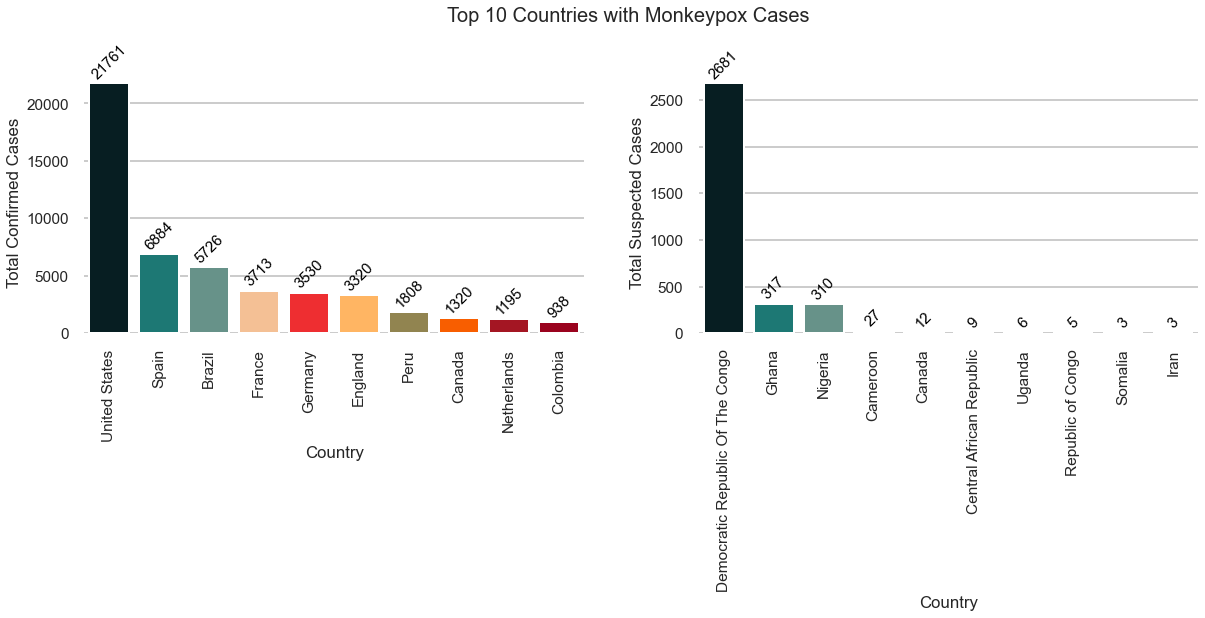

In [152]:
# 'case' dataset visualization
case_confirmed = case.sort_values(["Confirmed_Cases"], ascending = False)
case_suspected = case.sort_values(["Suspected_Cases"], ascending = False)

_,axs = plt.subplots(1,2, figsize=(18,6))
plt.tight_layout(pad=4.0)

sns.barplot(x=case_confirmed["Country"][:10], y=case_confirmed["Confirmed_Cases"], ax=axs[0], palette=palette, saturation=1)
axs[0].set_ylabel("Total Confirmed Cases")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
for container in axs[0].containers:
    axs[0].bar_label(container, label_type="edge", padding=2, size=15, color="black", rotation=45)
    
sns.barplot(x=case_suspected["Country"][:10], y=case_suspected["Suspected_Cases"], ax=axs[1], palette=palette, saturation=1)
axs[1].set_ylabel("Total Suspected Cases")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
for container in axs[1].containers:
    axs[1].bar_label(container, label_type="edge", padding=2, size=15, color="black", rotation=45)
    
plt.suptitle("Top 10 Countries with Monkeypox Cases", fontsize=20)
sns.despine(left=True, bottom=True)
plt.show()

Initial observations:
- United States has the highest confirmed cases. 
    - 3x higher than Spain who is second highest in confirmed cases
    - Though, I'd like to compare against total population to determine the rate of confirmed cases
- Democratic Republic of the Congo has the highest suspected cases
- Top 3 countries of suspected cases are in Africa